In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [59]:
!pip install pyarrow

In [60]:
# Reading Errands data
errands = pd.read_parquet('errands.parquet')
errands.head()

,order_number,errand_id,created,errand_category,errand_type,errand_action,errand_channel,is_test_errand
0,24770FC,52497975,2023-12-31 08:59:49,6: Payment questions,2: Payment not conf - CC,1: Info provided,1: Phone In,0
1,2479LIP,52502839,2023-12-31 11:36:31,6: Payment questions,3: Payment not conf - bank,1: Info provided,1: Phone In,0
2,247BO81,52520705,2024-01-01 00:02:32,6: Payment questions,6: No order but charged / charged twice / rese...,1: Info provided,19: Chat,0
3,247BZ9A,52520962,2024-01-01 00:23:39,9: Other services / products,3: Other airline services,7: Other,19: Chat,0
4,247BZDY,52521010,2024-01-01 00:28:26,5: Document & travel info,1: Have no document,6: Other,19: Chat,1


In [61]:
errands.shape

(2885296, 8)

In [62]:
errands.dtypes

order_number       object
errand_id           int64
created            object
errand_category    object
errand_type        object
errand_action      object
errand_channel     object
is_test_errand      int64
dtype: object

In [63]:
# Reading Orders data
orders = pd.read_parquet('orders.parquet')
orders.head()

,order_id,PNR,order_created_at,booking_system,Site_Country,Brand,Order_Amount,currency,Revenue,Partner,...,Device,client_entry_type,booking_system_source_type,Origin_Country,Destination_Country,Journey_Type_ID,Is_Changed,Is_Canceled,cancel_reason,change_reason
0,4607745402,VVNVMF,2024-01-01 00:00:01,System A,Italy,Brand A,824.68,Euro,9.09,Partner A,...,PC,b2bapi,GDS,Italy,Saudi Arabia,One-way,0,0,Undefined,Initial - Not Changed
1,4607744269,8WJRXE,2024-01-01 00:00:04,System A,Australia,Brand A,1760.80,Australian Dollar,14.74,Partner B,...,iPhone,metasearch,GDS,Australia,Philippines,Round-trip,1,0,Undefined,Schedule change: Primary Alternative
2,4607745343,EN91QW,2024-01-01 00:00:05,System B,Brazil,Brand B,977.50,Brazilian Real,58.94,Partner C,...,Android Phone,metasearch,API,Brazil,Brazil,Round-trip,0,0,Undefined,Initial - Not Changed
3,4607745473,PPY1VQ,2024-01-01 00:00:10,System B,USA,Brand A,61.78,US Dollar,10.09,Partner A,...,iPhone,b2bapi,API,USA,USA,Round-trip,0,0,Undefined,Initial - Not Changed
4,4607745421,75NN7W,2024-01-01 00:00:14,System C,Germany,Brand A,1756.50,Euro,9.09,Partner A,...,iPhone,b2bapi,NDC,Germany,USA,OpenJawSingleOrigin,0,0,Undefined,Initial - Not Changed


In [64]:
orders.shape

(6300206, 21)

In [65]:
orders.dtypes

order_id                               int64
PNR                                   object
order_created_at              datetime64[ns]
booking_system                        object
Site_Country                          object
Brand                                 object
Order_Amount                         float64
currency                              object
Revenue                              float64
Partner                               object
Customer_Group_Type                   object
Device                                object
client_entry_type                     object
booking_system_source_type            object
Origin_Country                        object
Destination_Country                   object
Journey_Type_ID                       object
Is_Changed                             int64
Is_Canceled                            int64
cancel_reason                         object
change_reason                         object
dtype: object

In [66]:
# Since order_number in errands data uses base 36 format, we convert it to int
errands.order_number = errands.order_number.apply(lambda x: int(x, 36))
errands.head()    

,order_number,errand_id,created,errand_category,errand_type,errand_action,errand_channel,is_test_errand
0,4607513832,52497975,2023-12-31 08:59:49,6: Payment questions,2: Payment not conf - CC,1: Info provided,1: Phone In,0
1,4607634481,52502839,2023-12-31 11:36:31,6: Payment questions,3: Payment not conf - bank,1: Info provided,1: Phone In,0
2,4607731297,52520705,2024-01-01 00:02:32,6: Payment questions,6: No order but charged / charged twice / rese...,1: Info provided,19: Chat,0
3,4607745598,52520962,2024-01-01 00:23:39,9: Other services / products,3: Other airline services,7: Other,19: Chat,0
4,4607745766,52521010,2024-01-01 00:28:26,5: Document & travel info,1: Have no document,6: Other,19: Chat,1


In [67]:
errands.dtypes

order_number        int64
errand_id           int64
created            object
errand_category    object
errand_type        object
errand_action      object
errand_channel     object
is_test_errand      int64
dtype: object

In [68]:
# len(set(errands.order_number.unique()).intersection(set(orders.order_id.unique())))

### Errands Data

In [69]:
errands.errand_category.value_counts()

2: Cancellation / refund                       697822
1: Rebooking                                   672608
18: Schedule change                            505953
5: Document & travel info                      343196
4: Change of name & passenger info             191253
43: No response                                140610
7: Baggage                                     140361
6: Payment questions                            49155
8: Seating                                      45013
9: Other services / products                    41936
41: Call disconnected                           16403
3: Claim wrong itinerary/dupe                    9864
13: Language problem                             8998
10: Force Majeure                                7440
25: Other Booking.com products                   4339
11: Site support                                 2470
46: No information provided                      1977
14: FL Fraud errands process                     1367
20: Ancillary team          

In [70]:
errands['created'] = pd.to_datetime(errands['created'], format='%Y-%m-%d %H:%M:%S')

In [71]:
## Extracting id from each of the columns
errands['errand_category_id'] = errands.errand_category.str.extract(r'(\d{,2})')
errands['errand_type_id'] = errands.errand_type.str.extract(r'(\d{,2})')
errands['errand_action_id'] = errands.errand_action.str.extract(r'(\d{,2})')
errands['errand_channel_id'] = errands.errand_channel.str.extract(r'(\d{,2})')
errands.head()

,order_number,errand_id,created,errand_category,errand_type,errand_action,errand_channel,is_test_errand,errand_category_id,errand_type_id,errand_action_id,errand_channel_id
0,4607513832,52497975,2023-12-31 08:59:49,6: Payment questions,2: Payment not conf - CC,1: Info provided,1: Phone In,0,6,2,1,1
1,4607634481,52502839,2023-12-31 11:36:31,6: Payment questions,3: Payment not conf - bank,1: Info provided,1: Phone In,0,6,3,1,1
2,4607731297,52520705,2024-01-01 00:02:32,6: Payment questions,6: No order but charged / charged twice / rese...,1: Info provided,19: Chat,0,6,6,1,19
3,4607745598,52520962,2024-01-01 00:23:39,9: Other services / products,3: Other airline services,7: Other,19: Chat,0,9,3,7,19
4,4607745766,52521010,2024-01-01 00:28:26,5: Document & travel info,1: Have no document,6: Other,19: Chat,1,5,1,6,19


In [72]:
# errands[errands['errand_category']=='23: Legal and Authority Claims Team']

,order_number,errand_id,created,errand_category,errand_type,errand_action,errand_channel,is_test_errand,errand_category_id,errand_type_id,errand_action_id,errand_channel_id
48443,4607088462,52954328,2024-01-09 01:13:50,23: Legal and Authority Claims Team,None,5. Force Majeure,1: Phone In,0,23,NaN,5,1
48444,4607915354,52954329,2024-01-09 01:13:52,23: Legal and Authority Claims Team,None,5. Force Majeure,1: Phone In,0,23,NaN,5,1
50695,4607875866,52969341,2024-01-09 09:02:00,23: Legal and Authority Claims Team,None,1: Mail In,2: Mail In,0,23,NaN,1,2
793579,4615047183,55600584,2024-02-24 08:46:18,23: Legal and Authority Claims Team,9: Payments,7. Customer Mistake,19: Chat,0,23,9,7,19
1087051,4616121128,56408481,2024-03-08 17:52:54,23: Legal and Authority Claims Team,2: First Line - Rebooking,2. Request,1: Phone In,0,23,2,2,1
1401799,4608692907,57213972,2024-03-22 18:52:14,23: Legal and Authority Claims Team,12: Airlines,12. Last Minute SC,1: Phone In,0,23,12,12,1
1515081,4615277933,57487038,2024-03-27 20:33:53,23: Legal and Authority Claims Team,1: First Line - Cancellation,1. Request,1: Phone In,0,23,1,1,1
1618863,4609581063,57761814,2024-04-02 08:48:57,23: Legal and Authority Claims Team,4: First Line - Name Correction,2. Delayed Handling,1: Phone In,0,23,4,2,1
1668960,4615273484,57921315,2024-04-04 15:06:28,23: Legal and Authority Claims Team,6: First Line - Virtual Interlining,1. Schedule Change,1: Phone In,0,23,6,1,1
1866700,4608867127,58671048,2024-04-17 19:56:19,23: Legal and Authority Claims Team,11: Customer Experience,9. VISA/Missing Travel Documentation,19: Chat,0,23,11,9,19


In [73]:
errands[errands['errand_type'].isna()]

,order_number,errand_id,created,errand_category,errand_type,errand_action,errand_channel,is_test_errand,errand_category_id,errand_type_id,errand_action_id,errand_channel_id
48443,4607088462,52954328,2024-01-09 01:13:50,23: Legal and Authority Claims Team,None,5. Force Majeure,1: Phone In,0,23,NaN,5,1
48444,4607915354,52954329,2024-01-09 01:13:52,23: Legal and Authority Claims Team,None,5. Force Majeure,1: Phone In,0,23,NaN,5,1
50695,4607875866,52969341,2024-01-09 09:02:00,23: Legal and Authority Claims Team,None,1: Mail In,2: Mail In,0,23,NaN,1,2


In [74]:
## Extracting description from each of the columns
errands['errand_category_desc'] = errands.apply(lambda row:row[3][len(str(row[8]))+2 :] if row[3] else "NA", axis=1).str.strip()
errands['errand_type_desc'] = errands.apply(lambda row:row[4][len(str(row[9]))+2 :] if row[4] else "NA", axis=1).str.strip()
errands['errand_action_desc'] = errands.apply(lambda row:row[5][len(str(row[10]))+2 :] if row[5] else "NA", axis=1).str.strip()
errands['errand_channel_desc'] = errands.apply(lambda row:row[6][len(str(row[11]))+2 :] if row[6] else "NA", axis=1).str.strip()
errands.head()

,order_number,errand_id,created,errand_category,errand_type,errand_action,errand_channel,is_test_errand,errand_category_id,errand_type_id,errand_action_id,errand_channel_id,errand_category_desc,errand_type_desc,errand_action_desc,errand_channel_desc
0,4607513832,52497975,2023-12-31 08:59:49,6: Payment questions,2: Payment not conf - CC,1: Info provided,1: Phone In,0,6,2,1,1,Payment questions,Payment not conf - CC,Info provided,Phone In
1,4607634481,52502839,2023-12-31 11:36:31,6: Payment questions,3: Payment not conf - bank,1: Info provided,1: Phone In,0,6,3,1,1,Payment questions,Payment not conf - bank,Info provided,Phone In
2,4607731297,52520705,2024-01-01 00:02:32,6: Payment questions,6: No order but charged / charged twice / rese...,1: Info provided,19: Chat,0,6,6,1,19,Payment questions,No order but charged / charged twice / reserve...,Info provided,Chat
3,4607745598,52520962,2024-01-01 00:23:39,9: Other services / products,3: Other airline services,7: Other,19: Chat,0,9,3,7,19,Other services / products,Other airline services,Other,Chat
4,4607745766,52521010,2024-01-01 00:28:26,5: Document & travel info,1: Have no document,6: Other,19: Chat,1,5,1,6,19,Document & travel info,Have no document,Other,Chat


In [75]:
## Errand Category distribution
errands.errand_category_desc.value_counts(normalize=True).apply(lambda x: format(x, 'f')).reset_index().head()

,index,errand_category_desc
0,Cancellation / refund,0.241855
1,Rebooking,0.233116
2,Schedule change,0.175356
3,Document & travel info,0.118947
4,Change of name & passenger info,0.066285


In [208]:
## Errand Category distribution
errands.errand_category_desc.value_counts(normalize=True).apply(lambda x: format(x, 'f')).reset_index().head(10).to_clipboard()

In [76]:
errands.errand_type_desc.value_counts(normalize=True).apply(lambda x: format(x, 'f')).reset_index().head()

,index,errand_type_desc
0,No Flexible Ticket,0.170915
1,Ask about cxnl rules,0.168055
2,We have inf. about SC,0.089006
3,Customer not reached,0.054325
4,Already cxnl,0.053755


In [77]:
errands[errands['errand_category_desc']=='Cancellation / refund'].errand_type_desc.value_counts(normalize=True).apply(lambda x: format(x, 'f')).reset_index().head()

,index,errand_type_desc
0,Ask about cxnl rules,0.694861
1,Already cxnl,0.222260
2,Incorrect department-SC,0.030410
3,Already handled,0.024339
4,Incorrect department,0.013531


In [78]:
## Errand Action when category is Cancellation / refund
errands[errands['errand_category_desc']=='Cancellation / refund'].errand_action_desc.value_counts(normalize=True).apply(lambda x: format(x, 'f')).reset_index().head()

,index,errand_action_desc
0,Not cxnl reservation,0.284624
1,Cnxl reservation,0.190427
2,Infd refund pending,0.115368
3,Referred to airline,0.076653
4,Info provided via e-mail,0.070108


In [212]:
## Errand Channel distribution
errands.errand_channel_desc.value_counts(normalize=True).reset_index()

,index,errand_channel_desc
0,Chat,0.428383
1,Phone In,0.321711
2,Mail In,0.079807
3,SC Phone in,0.074847
4,SC Chat,0.070678
5,SC Mail In,0.024574


In [80]:
errands.errand_action_desc.value_counts(normalize=True).reset_index().head()

,index,errand_action_desc
0,No change made,0.133588
1,Referred to airline,0.077859
2,Info provided,0.072464
3,Not cxnl reservation,0.068838
4,Already on support,0.051806


In [81]:
errands['Year'] = errands.created.dt.year
errands['Month'] = errands.created.dt.month_name()

In [82]:
errands['Year'].value_counts()

2024    2885294
2023          2
Name: Year, dtype: int64

In [83]:
errands['Month'].value_counts(normalize=True)

March        0.236226
February     0.194293
April        0.150895
January      0.122288
May          0.091583
June         0.064298
July         0.052308
August       0.036772
September    0.021825
October      0.015106
November     0.009788
December     0.004620
Name: Month, dtype: float64

In [211]:
errands.groupby(['Month']).apply(lambda x: x['errand_category_desc'].value_counts().index[0]).sort_index()

Month
April                    Rebooking
August             Schedule change
December           Schedule change
February     Cancellation / refund
January      Cancellation / refund
July               Schedule change
June               Schedule change
March                    Rebooking
May                Schedule change
November           Schedule change
October            Schedule change
September          Schedule change
dtype: object

In [85]:
errands.head()

,order_number,errand_id,created,errand_category,errand_type,errand_action,errand_channel,is_test_errand,errand_category_id,errand_type_id,errand_action_id,errand_channel_id,errand_category_desc,errand_type_desc,errand_action_desc,errand_channel_desc,Year,Month
0,4607513832,52497975,2023-12-31 08:59:49,6: Payment questions,2: Payment not conf - CC,1: Info provided,1: Phone In,0,6,2,1,1,Payment questions,Payment not conf - CC,Info provided,Phone In,2023,December
1,4607634481,52502839,2023-12-31 11:36:31,6: Payment questions,3: Payment not conf - bank,1: Info provided,1: Phone In,0,6,3,1,1,Payment questions,Payment not conf - bank,Info provided,Phone In,2023,December
2,4607731297,52520705,2024-01-01 00:02:32,6: Payment questions,6: No order but charged / charged twice / rese...,1: Info provided,19: Chat,0,6,6,1,19,Payment questions,No order but charged / charged twice / reserve...,Info provided,Chat,2024,January
3,4607745598,52520962,2024-01-01 00:23:39,9: Other services / products,3: Other airline services,7: Other,19: Chat,0,9,3,7,19,Other services / products,Other airline services,Other,Chat,2024,January
4,4607745766,52521010,2024-01-01 00:28:26,5: Document & travel info,1: Have no document,6: Other,19: Chat,1,5,1,6,19,Document & travel info,Have no document,Other,Chat,2024,January


### Orders Data

In [86]:
orders.iloc[0]

order_id                                 4607745402
PNR                                          VVNVMF
order_created_at                2024-01-01 00:00:01
booking_system                             System A
Site_Country                                  Italy
Brand                                       Brand A
Order_Amount                                 824.68
currency                                       Euro
Revenue                                        9.09
Partner                                   Partner A
Customer_Group_Type                          SINGLE
Device                                           PC
client_entry_type                            b2bapi
booking_system_source_type                      GDS
Origin_Country                                Italy
Destination_Country                    Saudi Arabia
Journey_Type_ID                             One-way
Is_Changed                                        0
Is_Canceled                                       0
cancel_reaso

In [87]:
orders['Brand'].value_counts(normalize=True).apply(lambda x : format(x,'f'))

Brand A    0.588691
Brand B    0.179990
Brand D    0.133419
Brand C    0.034099
Brand E    0.030306
Brand F    0.015468
Brand G    0.009623
Brand H    0.008006
Brand J    0.000203
Brand K    0.000153
Brand I    0.000040
Brand M    0.000001
Brand L    0.000000
Name: Brand, dtype: object

In [88]:
orders.shape, orders.drop_duplicates().shape, orders.drop_duplicates(subset=['order_id', 'PNR']).shape

((6300206, 21), (6300206, 21), (6300206, 21))

In [89]:
orders.tail(2)

,order_id,PNR,order_created_at,booking_system,Site_Country,Brand,Order_Amount,currency,Revenue,Partner,...,Device,client_entry_type,booking_system_source_type,Origin_Country,Destination_Country,Journey_Type_ID,Is_Changed,Is_Canceled,cancel_reason,change_reason
6300204,4611677611,IRSNUF,2024-03-31 23:59:57,System E,United Kingdom,Brand A,875.13,Pound Sterling,7.37,Partner A,...,Android Phone,b2bapi,GDS,United Kingdom,Korea,Round-trip,0,0,Undefined,Initial - Not Changed
6300205,4611677960,IQFDZX,2024-04-01 00:00:00,System E,France,Brand A,456.46,Euro,8.62,Partner A,...,PC,b2bapi,GDS,Japan,France,One-way,0,0,Undefined,Initial - Not Changed


In [90]:
orders['order_created_at'] = pd.to_datetime(orders['order_created_at'], format='%Y-%m-%d %H:%M:%S')

In [91]:
orders['Year'] = orders['order_created_at'].dt.year
orders['Month'] = orders['order_created_at'].dt.month_name()

In [92]:
orders.Year.value_counts()

2024    6300206
Name: Year, dtype: int64

In [93]:
orders.Month.value_counts()

January     2174078
February    2096759
March       2029368
April             1
Name: Month, dtype: int64

In [94]:
orders.isna().sum()

order_id                      0
PNR                           0
order_created_at              0
booking_system                0
Site_Country                  0
Brand                         0
Order_Amount                  0
currency                      0
Revenue                       0
Partner                       0
Customer_Group_Type           0
Device                        0
client_entry_type             0
booking_system_source_type    0
Origin_Country                0
Destination_Country           0
Journey_Type_ID               0
Is_Changed                    0
Is_Canceled                   0
cancel_reason                 0
change_reason                 0
Year                          0
Month                         0
dtype: int64

In [192]:
cancel = orders.groupby('order_id')['Is_Canceled'].sum().reset_index()
print("Order Cancelation Percentage :", cancel['Is_Canceled'].sum()/cancel.shape[0])

Order Cancelation Percentage : 0.03912760947816627


In [95]:
errands.isna().sum()

order_number               0
errand_id                  0
created                    0
errand_category            0
errand_type                3
errand_action           2338
errand_channel             0
is_test_errand             0
errand_category_id         0
errand_type_id             3
errand_action_id        2338
errand_channel_id          0
errand_category_desc       0
errand_type_desc           0
errand_action_desc         0
errand_channel_desc        0
Year                       0
Month                      0
dtype: int64

In [96]:
errands['errand_action'] = np.where(errands['errand_action'].isna(), 'NA', errands['errand_action'])
errands['errand_action_id'] = np.where(errands['errand_action_id'].isna(), 'NA', errands['errand_action_id'])
errands['errand_type'] = np.where(errands['errand_type'].isna(), 'NA', errands['errand_type'])
errands['errand_type_id'] = np.where(errands['errand_type_id'].isna(), 'NA', errands['errand_type_id'])

In [97]:
errands[errands['errand_action'].isna()]['errand_channel'].unique()

array([], dtype=object)

In [98]:
errands[errands['errand_action'].isna()]

,order_number,errand_id,created,errand_category,errand_type,errand_action,errand_channel,is_test_errand,errand_category_id,errand_type_id,errand_action_id,errand_channel_id,errand_category_desc,errand_type_desc,errand_action_desc,errand_channel_desc,Year,Month


In [99]:
orders.shape

(6300206, 23)

In [141]:
data = pd.merge(orders, errands, left_on='order_id', right_on='order_number', how='left')
data.shape

(8160363, 41)

In [142]:
data.isna().sum()

order_id                            0
PNR                                 0
order_created_at                    0
booking_system                      0
Site_Country                        0
Brand                               0
Order_Amount                        0
currency                            0
Revenue                             0
Partner                             0
Customer_Group_Type                 0
Device                              0
client_entry_type                   0
booking_system_source_type          0
Origin_Country                      0
Destination_Country                 0
Journey_Type_ID                     0
Is_Changed                          0
Is_Canceled                         0
cancel_reason                       0
change_reason                       0
Year_x                              0
Month_x                             0
order_number                  5275067
errand_id                     5275067
created                       5275067
errand_categ

In [143]:
total_errs = data.groupby(['order_id'])['errand_id'].nunique().reset_index()
total_errs['errand_id'].mean()

0.4579685172199131

In [144]:
data['number_contacts'] = data.groupby('order_id')['errand_id'].transform('nunique')
contacts = data[data['number_contacts']!=0]
# contacts = data.copy()

In [145]:
data[data['number_contacts']!=0].shape[0], data[data['number_contacts']==0].shape[0], data[data['number_contacts']!=0].shape[0] + data[data['number_contacts']==0].shape[0], data.shape[0]

(2885296, 5275067, 8160363, 8160363)

In [146]:
# Number of contacts per order
df = contacts.groupby('order_id')['errand_id'].nunique().reset_index()
df = df.rename(columns={'errand_id':'Number of Contacts'})
df

,order_id,Number of Contacts
0,4600000000,1
1,4600000009,4
2,4600000012,1
3,4600000020,2
4,4600000024,1
...,...,...
1025134,4619999964,1
1025135,4619999974,1
1025136,4619999985,1
1025137,4619999988,7


In [147]:
# Avg number of contacs per order
df['Number of Contacts'].mean()

2.8145412475771576

In [148]:
distr = df['Number of Contacts'].value_counts(normalize=True).apply(lambda x:format(x, 'f')).reset_index().rename(columns={'index':'Total Contacts', 'Number of Contacts':'Order Perc'})
distr['Total Contacts'] = distr['Total Contacts'].astype(int)
distr['Order Perc'] = np.round(distr['Order Perc'].astype(float), 2)
distr

,Total Contacts,Order Perc
0,1,0.45
1,2,0.22
2,3,0.12
3,4,0.07
4,5,0.04
...,...,...
112,81,0.00
113,154,0.00
114,243,0.00
115,90,0.00


In [149]:
distr['Total Contacts'].unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  38,  37,  39,
        41,  40,  45,  46,  43,  44,  42,  48,  53,  47,  49,  50,  51,
        52,  62,  57,  54,  58,  56,  55,  64,  63,  60,  70,  61,  71,
        65,  67,  69,  66, 103,  59,  77,  74,  80,  68,  79,  76, 108,
        91,  83,  75,  72,  89,  84,  93,  98, 117,  82,  85,  96,  88,
       129, 141, 107, 184, 100,  95, 167,  87, 139,  73, 171,  92, 149,
       166, 173, 176, 185,  78, 144, 196,  97,  81, 154, 243,  90,  86])

In [150]:
df['Number of Contacts'].dtype

dtype('int64')

In [151]:
df['Total Contacts'] = np.where(df['Number of Contacts']>7, 'More than 7 contacts', df['Number of Contacts'])
df.columns

Index(['order_id', 'Number of Contacts', 'Total Contacts'], dtype='object')

In [222]:
df['Total Contacts'].value_counts(normalize=True).apply(lambda x:format(x, 'f')).reset_index().rename(columns={'index':'Total_Contacts', 'Total Contacts':'Order Perc'}).to_clipboard()
# distr['Total Contacts'] = distr['Total Contacts'].astype(int)
# distr['Order Perc'] = np.round(distr['Order Perc'].astype(float), 2)

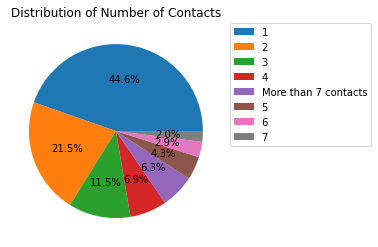

In [152]:
# colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
data1 = df['Total Contacts'].value_counts()
ax = data1.plot(kind="pie", autopct='%1.1f%%', legend=True, title='Distribution of Number of Contacts', ylabel='', labeldistance=None)
ax.legend(bbox_to_anchor=(1, 1.02), loc='upper left')
plt.show()
# distr.plot(y='Order Perc', kind='pie');

In [153]:
distr['Order Perc'][:7].sum()

0.9500000000000002

In [154]:
contacts.to_csv('Orders with Contacts.csv')

In [155]:
# contacts = pd.read_csv('Orders with Contacts.csv')
# contacts.groupby('order_id').value_counts().reset_index()

In [157]:
data.head()

,order_id,PNR,order_created_at,booking_system,Site_Country,Brand,Order_Amount,currency,Revenue,Partner,...,errand_type_id,errand_action_id,errand_channel_id,errand_category_desc,errand_type_desc,errand_action_desc,errand_channel_desc,Year_y,Month_y,number_contacts
0,4607745402,VVNVMF,2024-01-01 00:00:01,System A,Italy,Brand A,824.68,Euro,9.09,Partner A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,4607744269,8WJRXE,2024-01-01 00:00:04,System A,Australia,Brand A,1760.80,Australian Dollar,14.74,Partner B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,4607745343,EN91QW,2024-01-01 00:00:05,System B,Brazil,Brand B,977.50,Brazilian Real,58.94,Partner C,...,2,7,34,Schedule change,We have inf. about SC,Send to support queue,SC Phone in,2024.0,July,2
3,4607745343,EN91QW,2024-01-01 00:00:05,System B,Brazil,Brand B,977.50,Brazilian Real,58.94,Partner C,...,1,9,1,Schedule change,ax has discovered sc by themselves,Referring to airline,Phone In,2024.0,July,2
4,4607745473,PPY1VQ,2024-01-01 00:00:10,System B,USA,Brand A,61.78,US Dollar,10.09,Partner A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [160]:
data[data['number_contacts']>7]['booking_system'].value_counts(normalize=True)

System A                               0.400666
System E                               0.203786
System B                               0.101595
System D                               0.098658
System C                               0.048125
                                         ...   
System E,System G,System B,System A    0.000010
System G,System A,System B,System D    0.000010
System F,System C                      0.000010
System E,System A,System B,System G    0.000010
System B,System A,System D,System G    0.000010
Name: booking_system, Length: 159, dtype: float64

In [162]:
data[data['number_contacts']>7]['Brand'].value_counts(normalize=True)

Brand A    0.520655
Brand B    0.199296
Brand D    0.172050
Brand E    0.036340
Brand C    0.035860
Brand F    0.017027
Brand G    0.009296
Brand H    0.009016
Brand K    0.000188
Brand I    0.000143
Brand J    0.000129
Name: Brand, dtype: float64

In [166]:
data[data['number_contacts']>7]['Device'].value_counts(normalize=True)

PC                0.473751
iPhone            0.325527
Android Phone     0.169358
iPad              0.011653
Android Tablet    0.009873
Unknown           0.009247
AnonPhone         0.000547
BlackBerry        0.000025
iPod              0.000019
Name: Device, dtype: float64

In [164]:
data.columns

Index(['order_id', 'PNR', 'order_created_at', 'booking_system', 'Site_Country',
       'Brand', 'Order_Amount', 'currency', 'Revenue', 'Partner',
       'Customer_Group_Type', 'Device', 'client_entry_type',
       'booking_system_source_type', 'Origin_Country', 'Destination_Country',
       'Journey_Type_ID', 'Is_Changed', 'Is_Canceled', 'cancel_reason',
       'change_reason', 'Year_x', 'Month_x', 'order_number', 'errand_id',
       'created', 'errand_category', 'errand_type', 'errand_action',
       'errand_channel', 'is_test_errand', 'errand_category_id',
       'errand_type_id', 'errand_action_id', 'errand_channel_id',
       'errand_category_desc', 'errand_type_desc', 'errand_action_desc',
       'errand_channel_desc', 'Year_y', 'Month_y', 'number_contacts'],
      dtype='object')

In [172]:
cust_group = data.groupby('Customer_Group_Type')['errand_id'].nunique().reset_index().rename(columns={'errand_id':'Number_Contacts',})
cust_group['Contacts_Perc'] = cust_group['Number_Contacts']/np.sum(cust_group['Number_Contacts'])
cust_group

,Customer_Group_Type,Number_Contacts,Contacts_Perc
0,COUPLE,804658,0.278882
1,FAMILY,444456,0.154042
2,GROUP,216048,0.074879
3,SINGLE,1420134,0.492197


In [223]:
cust_group.to_clipboard()

In [173]:
# Brand v/s Contacts
brand = data.groupby('Brand')['errand_id'].nunique().reset_index().rename(columns={'errand_id':'Number_Contacts'})
brand['Contacts_Perc'] = brand['Number_Contacts']/np.sum(brand['Number_Contacts'])
brand

,Brand,Number_Contacts,Contacts_Perc
0,Brand A,1616834,0.560370
1,Brand B,533968,0.185065
2,Brand C,101325,0.035118
3,Brand D,439663,0.152381
4,Brand E,95687,0.033164
5,Brand F,45406,0.015737
6,Brand G,26843,0.009303
7,Brand H,24291,0.008419
8,Brand I,274,0.000095
9,Brand J,488,0.000169


In [204]:
# Brand v/s Order
non_cancel = data[data['Is_Canceled']==0]
brand = non_cancel.groupby('Brand').agg(Number_Orders=('order_id', 'nunique'), Total_Amount=('Order_Amount', 'sum'), Total_Revenue=('Revenue', 'sum')).reset_index()
brand['Orders_Perc'] = brand['Number_Orders']/np.sum(brand['Number_Orders'])
brand['Amount_Perc'] = brand['Total_Amount']/np.sum(brand['Total_Amount'])
brand['Revenue_Perc'] = brand['Total_Revenue']/np.sum(brand['Total_Revenue'])
brand['Revenue_Perc'] = brand['Revenue_Perc'].apply(lambda x:format(x,'f'))
brand['Orders_Perc'] = brand['Orders_Perc'].apply(lambda x:format(x,'f'))
brand['Amount_Perc'] = brand['Amount_Perc'].apply(lambda x:format(x,'f'))
brand.sort_values(by='Revenue_Perc', ascending=False)

,Brand,Number_Orders,Total_Amount,Total_Revenue,Orders_Perc,Amount_Perc,Revenue_Perc
1,Brand B,1094772,2.876542e+11,1.595781e+10,0.180844,0.547135,0.677083
3,Brand D,809478,1.521927e+11,5.503350e+09,0.133716,0.289480,0.233505
0,Brand A,3552692,6.802424e+10,1.179354e+09,0.586863,0.129386,0.050040
4,Brand E,183640,1.537832e+10,7.822862e+08,0.030335,0.029250,0.033192
2,Brand C,208637,1.596134e+09,9.328503e+07,0.034464,0.003036,0.003958
7,Brand H,48922,3.172531e+08,1.901641e+07,0.008081,0.000603,0.000807
6,Brand G,58744,2.630201e+08,1.698457e+07,0.009704,0.000500,0.000721
5,Brand F,94402,3.047287e+08,1.522868e+07,0.015594,0.000580,0.000646
10,Brand K,935,1.095087e+07,1.009179e+06,0.000154,0.000021,0.000043
8,Brand I,232,3.614944e+06,1.092274e+05,0.000038,0.000007,0.000005


In [195]:
contacts['cancel_reason'].value_counts(normalize=True).apply(lambda x:format(x,'f'))

Undefined                                0.779158
Schedule Change - refund                 0.070935
Ticket rules - airline fee               0.046339
Void                                     0.023143
Ticket rules - taxes                     0.019889
Ticket rules - no refund to customer     0.010242
Force Majeure - refund                   0.006427
GDPR Waiver                              0.005739
Cancellation Guarantee                   0.004778
24h airline rule                         0.004239
24H BR Cancellation                      0.003456
Schedule change - no ETG claim           0.003399
Connection Guarantee                     0.003171
Tech error - ticket                      0.003133
Orphan funds                             0.002957
Failed Flex Rebooking                    0.002823
Force Majeure - No ETG claim             0.002656
Cancellation protection XCover           0.002129
Dupe                                     0.001271
Ticket rules - cancel after departure    0.001043


In [194]:
cancel = contacts.groupby('order_id')['Is_Canceled'].sum().reset_index()
print("Order Cancelation Percentage :", cancel['Is_Canceled'].sum()/cancel.shape[0])

Order Cancelation Percentage : 0.6215625393239356


In [196]:
contacts.columns

Index(['order_id', 'PNR', 'order_created_at', 'booking_system', 'Site_Country',
       'Brand', 'Order_Amount', 'currency', 'Revenue', 'Partner',
       'Customer_Group_Type', 'Device', 'client_entry_type',
       'booking_system_source_type', 'Origin_Country', 'Destination_Country',
       'Journey_Type_ID', 'Is_Changed', 'Is_Canceled', 'cancel_reason',
       'change_reason', 'Year_x', 'Month_x', 'order_number', 'errand_id',
       'created', 'errand_category', 'errand_type', 'errand_action',
       'errand_channel', 'is_test_errand', 'errand_category_id',
       'errand_type_id', 'errand_action_id', 'errand_channel_id',
       'errand_category_desc', 'errand_type_desc', 'errand_action_desc',
       'errand_channel_desc', 'Year_y', 'Month_y', 'number_contacts'],
      dtype='object')

In [201]:
# Errand Category v/s Order
cat = contacts.groupby('errand_category_desc').agg(Total_Orders=('order_id','nunique')).reset_index()
cat['Order_Perc'] = cat['Total_Orders']/np.sum(cat['Total_Orders'])
cat['Order_Perc'] = cat['Order_Perc'].apply(lambda x:format(x,'f'))
cat.sort_values(by='Order_Perc', ascending=False)

,errand_category_desc,Total_Orders,Order_Perc
11,Cancellation / refund,332159,0.224012
37,Rebooking,307853,0.207620
17,Document & travel info,250379,0.168859
39,Schedule change,166708,0.112430
29,No response,101472,0.068434
12,Change of name & passenger info,99363,0.067012
7,Baggage,88684,0.059810
34,Payment questions,35183,0.023728
40,Seating,28500,0.019221
31,Other services / products,28107,0.018956
